In [1]:
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Simulation Parameters
buy_rate = 2500.0 # Purchase rate per unit time for systematic buyers
sell_rate = 2500.0 # Sale rate per unit time for systematic sellers
eta0 = 0.005 # CEX proportional cost
mu = 0.0  # Mean of CEX price shock

# Set of AMM Fee values from simulation
eta1_vals = np.array([i*0.00001 for i in range(0,1001)])

# Set of sigma values from simulation
sigma_vals = np.array([i*0.001 for i in range(1,101)])

In [3]:
# Read file
filename = "all_outputs_eta0_" + str(eta0) + "_mu_" + str(mu) \
            + "_buy_" + str(round(buy_rate)) + "_sell_" + str(round(sell_rate))+ ".pkl"

with open(filename, "rb") as f:
    sim_outputs = pickle.load(f)

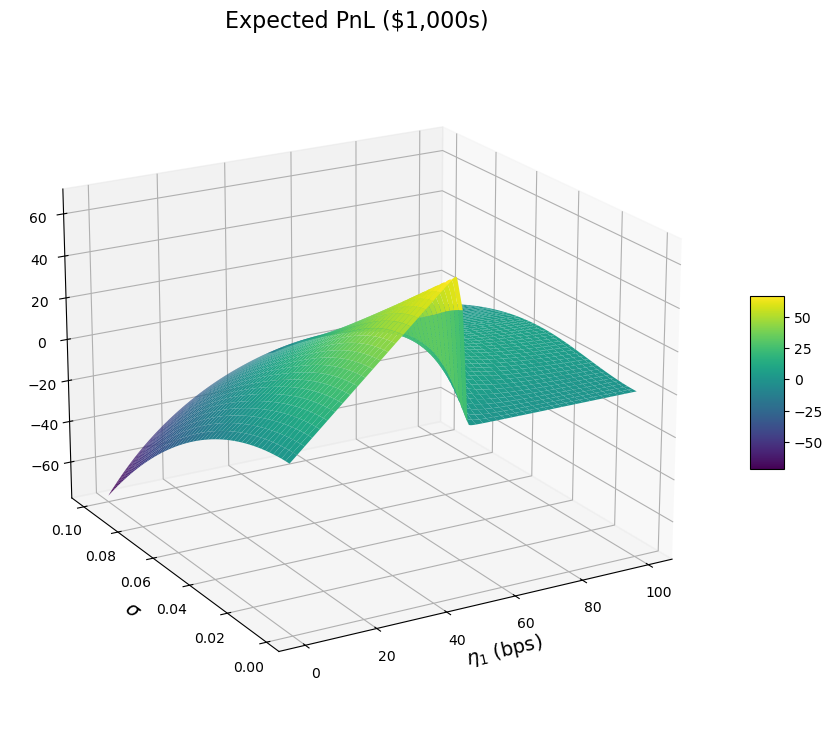

In [4]:
# Create a 2D array to store the objective value (Expected PnL) for each (sigma, eta1) pair.
obj = np.empty((len(sigma_vals), len(eta1_vals)))

for i, sigma in enumerate(sigma_vals):
    outputs = sim_outputs[sigma]  # List of outputs for this sigma value
    for j in range(len(eta1_vals)):
        obj[i, j] = (outputs[j,0]+outputs[j,1]+outputs[j,2]+outputs[j,3]-outputs[j,4])/1000 # Compute objective

# Create a meshgrid for plotting.
ETA, SIGMA = np.meshgrid(eta1_vals, sigma_vals)

# Set figure size.
fig = plt.figure(figsize=(12, 9)) 
ax = fig.add_subplot(111, projection='3d')

# Set elevation and azimuth angles for plot.
ax.view_init(elev=20, azim=-120)

# Surface plot.
surface = ax.plot_surface(ETA * 10000, SIGMA, obj, cmap='viridis')

# Axes labels.
ax.set_xlabel(r'$\eta_1$ (bps)', fontsize=14)
ax.set_ylabel(r'$\sigma$', fontsize=14)
ax.set_zlabel('')
ax.set_title('Expected PnL ($1,000s)', fontsize=16)

# Add color bar.
fig.colorbar(surface, ax=ax, shrink=0.25, aspect=5)
plt.show()

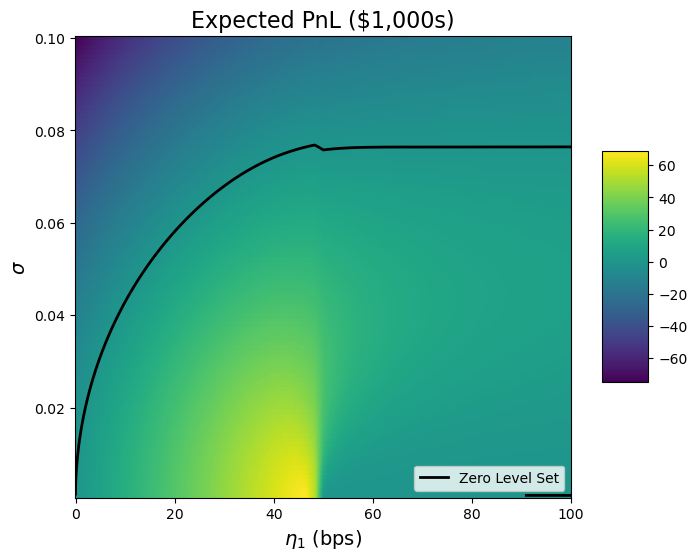

In [5]:
# Create a heatmap.
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.pcolormesh(ETA * 10000, SIGMA, obj, cmap='viridis', shading='auto')

# Overlay a black contour line at the zero level of the objective function.
contour = ax.contour(ETA * 10000, SIGMA, obj, levels=[0], colors='black', linewidths=2)

# Create a proxy for the contour line to use in the legend.
zls_line = Line2D([0], [0], color='black', lw=2, label='Zero Level Set')

# Add the legend.
ax.legend(handles=[zls_line], loc='lower right')

# Axes labels.
ax.set_xlabel(r'$\eta_1$ (bps)', fontsize=14)
ax.set_ylabel(r'$\sigma$', fontsize=14)
ax.set_title('Expected PnL ($1,000s)', fontsize=16)

# Add a colorbar.
cbar = fig.colorbar(heatmap, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('', fontsize=14)

plt.show()

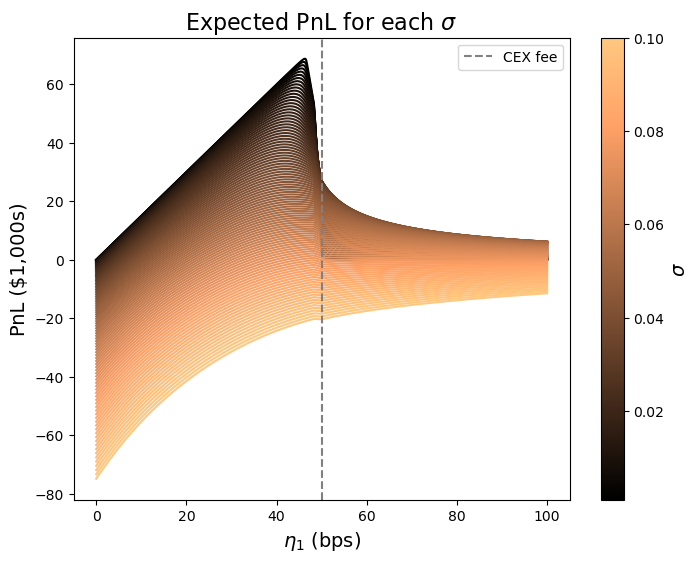

In [6]:
# Create a color gradient in the values of sigma.
norm_sigma = mpl.colors.Normalize(vmin=np.min(sigma_vals), vmax=np.max(sigma_vals))
cmap = plt.get_cmap("copper")

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the objective (Expected PnL) as a function of eta1 for each sigma value.
for i, sigma in enumerate(sigma_vals):
    # Get a color corresponding to the current sigma and plot the objective.
    color = cmap(norm_sigma(sigma))
    ax.plot(eta1_vals * 10000, obj[i, :], color=color, label='')

# Add vertical line to indicate CEX fee level
plt.axvline(x=eta0 * 10000, color="grey", linestyle="--", label="CEX fee")

# Label the axes.
ax.set_xlabel(r'$\eta_1$ (bps)', fontsize=14)
ax.set_ylabel('PnL ($1,000s)', fontsize=14)
ax.set_title(r'Expected PnL for each $\sigma$', fontsize=16)
ax.legend(loc='upper right')

# Add a colorbar corresponding to the value of sigma.
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_sigma)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r'$\sigma$', fontsize=14)

plt.show()